<a href="https://colab.research.google.com/github/Laila4563/House-Prices-Prediction-Project/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Analysis & Understanding Dataset

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [246]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/students_train.csv")
df.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1.0,Bobby JacksOn,30.0,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,2/2/2024,Paracetamol,Normal
1,2.0,LesLie TErRy,62.0,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,3.0,DaNnY sMitH,76.0,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,10/7/2022,Aspirin,Normal
3,4.0,andrEw waTtS,28.0,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,12/18/2020,Ibuprofen,Abnormal
4,5.0,adrIENNE bEll,43.0,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,10/9/2022,Penicillin,Abnormal


In [248]:
df.tail()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
df.isnull().sum()

,0
ID,5500
Name,5500
Age,5500
Gender,5500
Blood Type,5500
Medical Condition,5500
Date of Admission,5500
Doctor,5500
Hospital,5500
Insurance Provider,5500


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  50000 non-null  float64
 1   Name                50000 non-null  object 
 2   Age                 50000 non-null  float64
 3   Gender              50000 non-null  object 
 4   Blood Type          50000 non-null  object 
 5   Medical Condition   50000 non-null  object 
 6   Date of Admission   50000 non-null  object 
 7   Doctor              50000 non-null  object 
 8   Hospital            50000 non-null  object 
 9   Insurance Provider  50000 non-null  object 
 10  Billing Amount      50000 non-null  float64
 11  Room Number         50000 non-null  float64
 12  Admission Type      50000 non-null  object 
 13  Discharge Date      50000 non-null  object 
 14  Medication          50000 non-null  object 
 15  Test Results        50000 non-null  object 
dtypes: f

In [251]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 55500 rows and 16 columns.


In [252]:
#Summarize categorical columns:
for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

Value counts for Name:
Name
DAvId muNoZ          2
PAUL SMith           2
DAniEl sMIth         2
TInA white           2
LOrI coOK            2
                    ..
NanCY DAughERtY      1
ryaN moss            1
MERcEdes garCIa      1
RebECCA VelAzQUEZ    1
dAnieLlE hARVEY      1
Name: count, Length: 49992, dtype: int64

Value counts for Gender:
Gender
Female    25011
Male      24989
Name: count, dtype: int64

Value counts for Blood Type:
Blood Type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64

Value counts for Medical Condition:
Medical Condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64

Value counts for Date of Admission:
Date of Admission
3/16/2024     45
8/10/2023     44
12/28/2021    43
8/24/2019     43
11/4/2019     43
              ..
5/28/2022     14
5/23/2022     13
2/6/2021      13
7/22/2019

In [253]:
for col in df.columns:
        num_unique = df[col].nunique()
        print(f"Column '{col}' has {num_unique} unique values.")

Column 'ID' has 50000 unique values.
Column 'Name' has 49992 unique values.
Column 'Age' has 68 unique values.
Column 'Gender' has 2 unique values.
Column 'Blood Type' has 8 unique values.
Column 'Medical Condition' has 6 unique values.
Column 'Date of Admission' has 1827 unique values.
Column 'Doctor' has 40341 unique values.
Column 'Hospital' has 39876 unique values.
Column 'Insurance Provider' has 5 unique values.
Column 'Billing Amount' has 50000 unique values.
Column 'Room Number' has 400 unique values.
Column 'Admission Type' has 3 unique values.
Column 'Discharge Date' has 1856 unique values.
Column 'Medication' has 5 unique values.
Column 'Test Results' has 3 unique values.


In [254]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")
# View the duplicated rows
duplicated_rows = df[df.duplicated()]
print("\nDuplicated rows:")
print(duplicated_rows)

Number of duplicate rows: 5499

Duplicated rows:
       ID Name  Age Gender Blood Type Medical Condition Date of Admission  \
50001 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50002 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50003 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50004 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
50005 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
...    ..  ...  ...    ...        ...               ...               ...   
55495 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55496 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55497 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55498 NaN  NaN  NaN    NaN        NaN               NaN               NaN   
55499 NaN  NaN  NaN    NaN        NaN               NaN               NaN   

      Doctor Hospital Insu

In [255]:
# 1. Descriptive statistics for numeric columns
numeric_desc = df.describe()
print("Descriptive Statistics (Numeric Columns):")
print(numeric_desc)

Descriptive Statistics (Numeric Columns):
                 ID           Age  Billing Amount   Room Number
count  50000.000000  50000.000000    50000.000000  50000.000000
mean   25000.500000     51.580360    25555.691557    301.032260
std    14433.901067     19.582194    14215.932247    115.228819
min        1.000000     18.000000    -2008.492140    101.000000
25%    12500.750000     35.000000    13239.403090    202.000000
50%    25000.500000     52.000000    25541.302835    302.000000
75%    37500.250000     68.000000    37853.996817    400.000000
max    50000.000000     85.000000    52764.276740    500.000000


In [256]:
# 2. Frequency distribution for top 10 values in categorical variables
categorical_cols = df.select_dtypes(include='object').columns
print("\nFrequency Distribution (Top 10 per Categorical Column):")
for col in categorical_cols:
    print(f"\nTop values in '{col}':")
    print(df[col].value_counts().head(10))


Frequency Distribution (Top 10 per Categorical Column):

Top values in 'Name':
Name
DAvId muNoZ      2
PAUL SMith       2
DAniEl sMIth     2
TInA white       2
LOrI coOK        2
aMy smiTh        2
ADAM OrR         2
jaMES SmITH      2
DaVid grAhAm     1
viCtOr franco    1
Name: count, dtype: int64

Top values in 'Gender':
Gender
Female    25011
Male      24989
Name: count, dtype: int64

Top values in 'Blood Type':
Blood Type
AB+    6291
B+     6278
A-     6261
AB-    6259
A+     6246
O+     6235
B-     6230
O-     6200
Name: count, dtype: int64

Top values in 'Medical Condition':
Medical Condition
Arthritis       8439
Diabetes        8384
Hypertension    8319
Cancer          8294
Obesity         8292
Asthma          8272
Name: count, dtype: int64

Top values in 'Date of Admission':
Date of Admission
3/16/2024     45
8/10/2023     44
12/28/2021    43
8/24/2019     43
11/4/2019     43
1/3/2021      43
10/22/2020    42
3/28/2022     42
1/9/2022      41
9/22/2022     41
Name: count, dtyp

In [257]:
# 3. Correlation matrix for numerical features
print("\nCorrelation Matrix:")
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)


Correlation Matrix:
                      ID       Age  Billing Amount  Room Number
ID              1.000000 -0.004243       -0.003112     0.007199
Age            -0.004243  1.000000       -0.001009    -0.000957
Billing Amount -0.003112 -0.001009        1.000000    -0.003899
Room Number     0.007199 -0.000957       -0.003899     1.000000


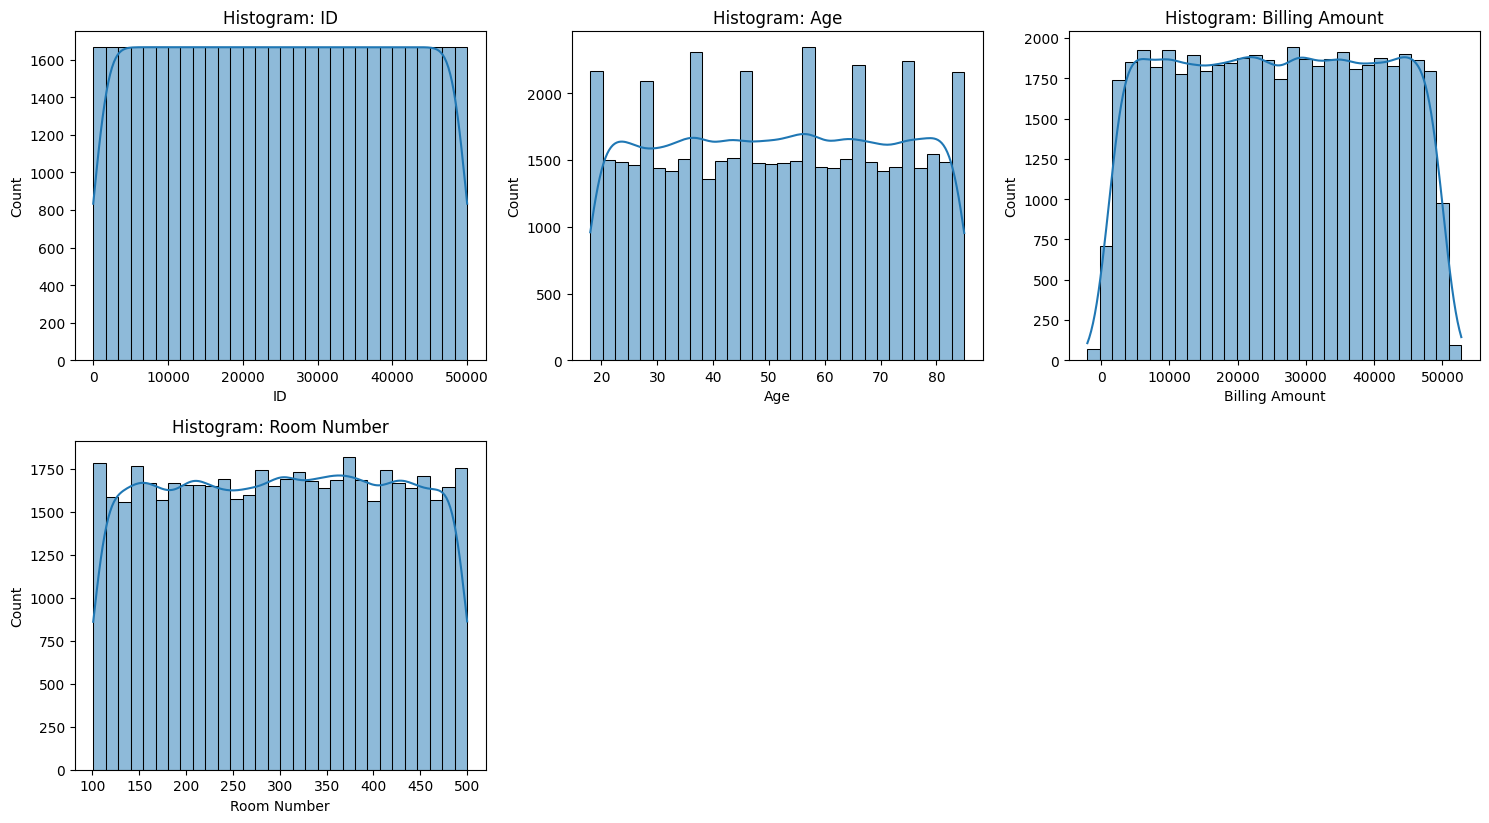

In [258]:
# 4. Distribution plots (Histograms) for numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram: {col}')
plt.tight_layout()
plt.show()

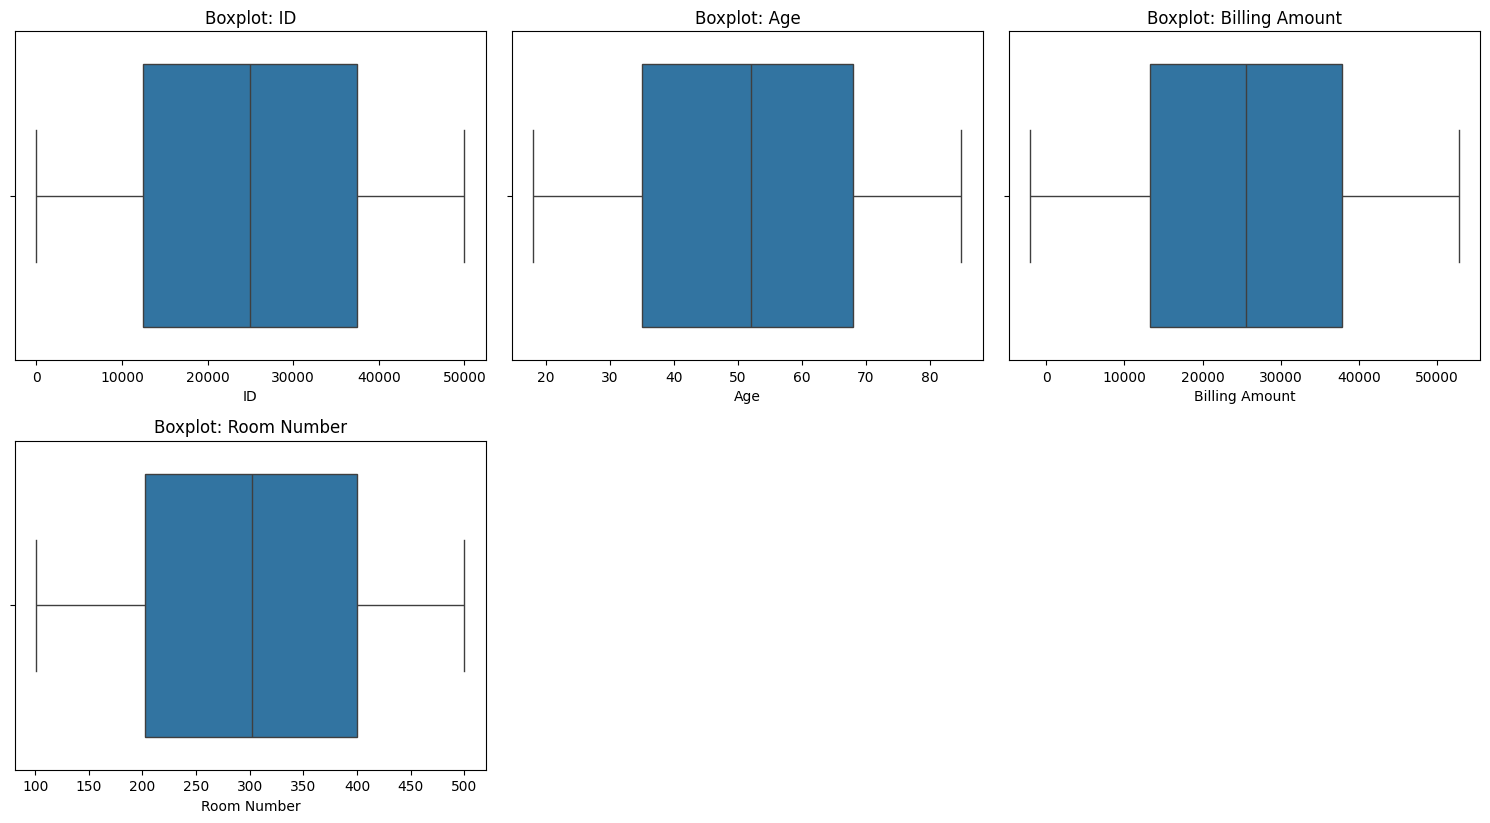

In [259]:
# 5. Boxplots for outlier detection
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

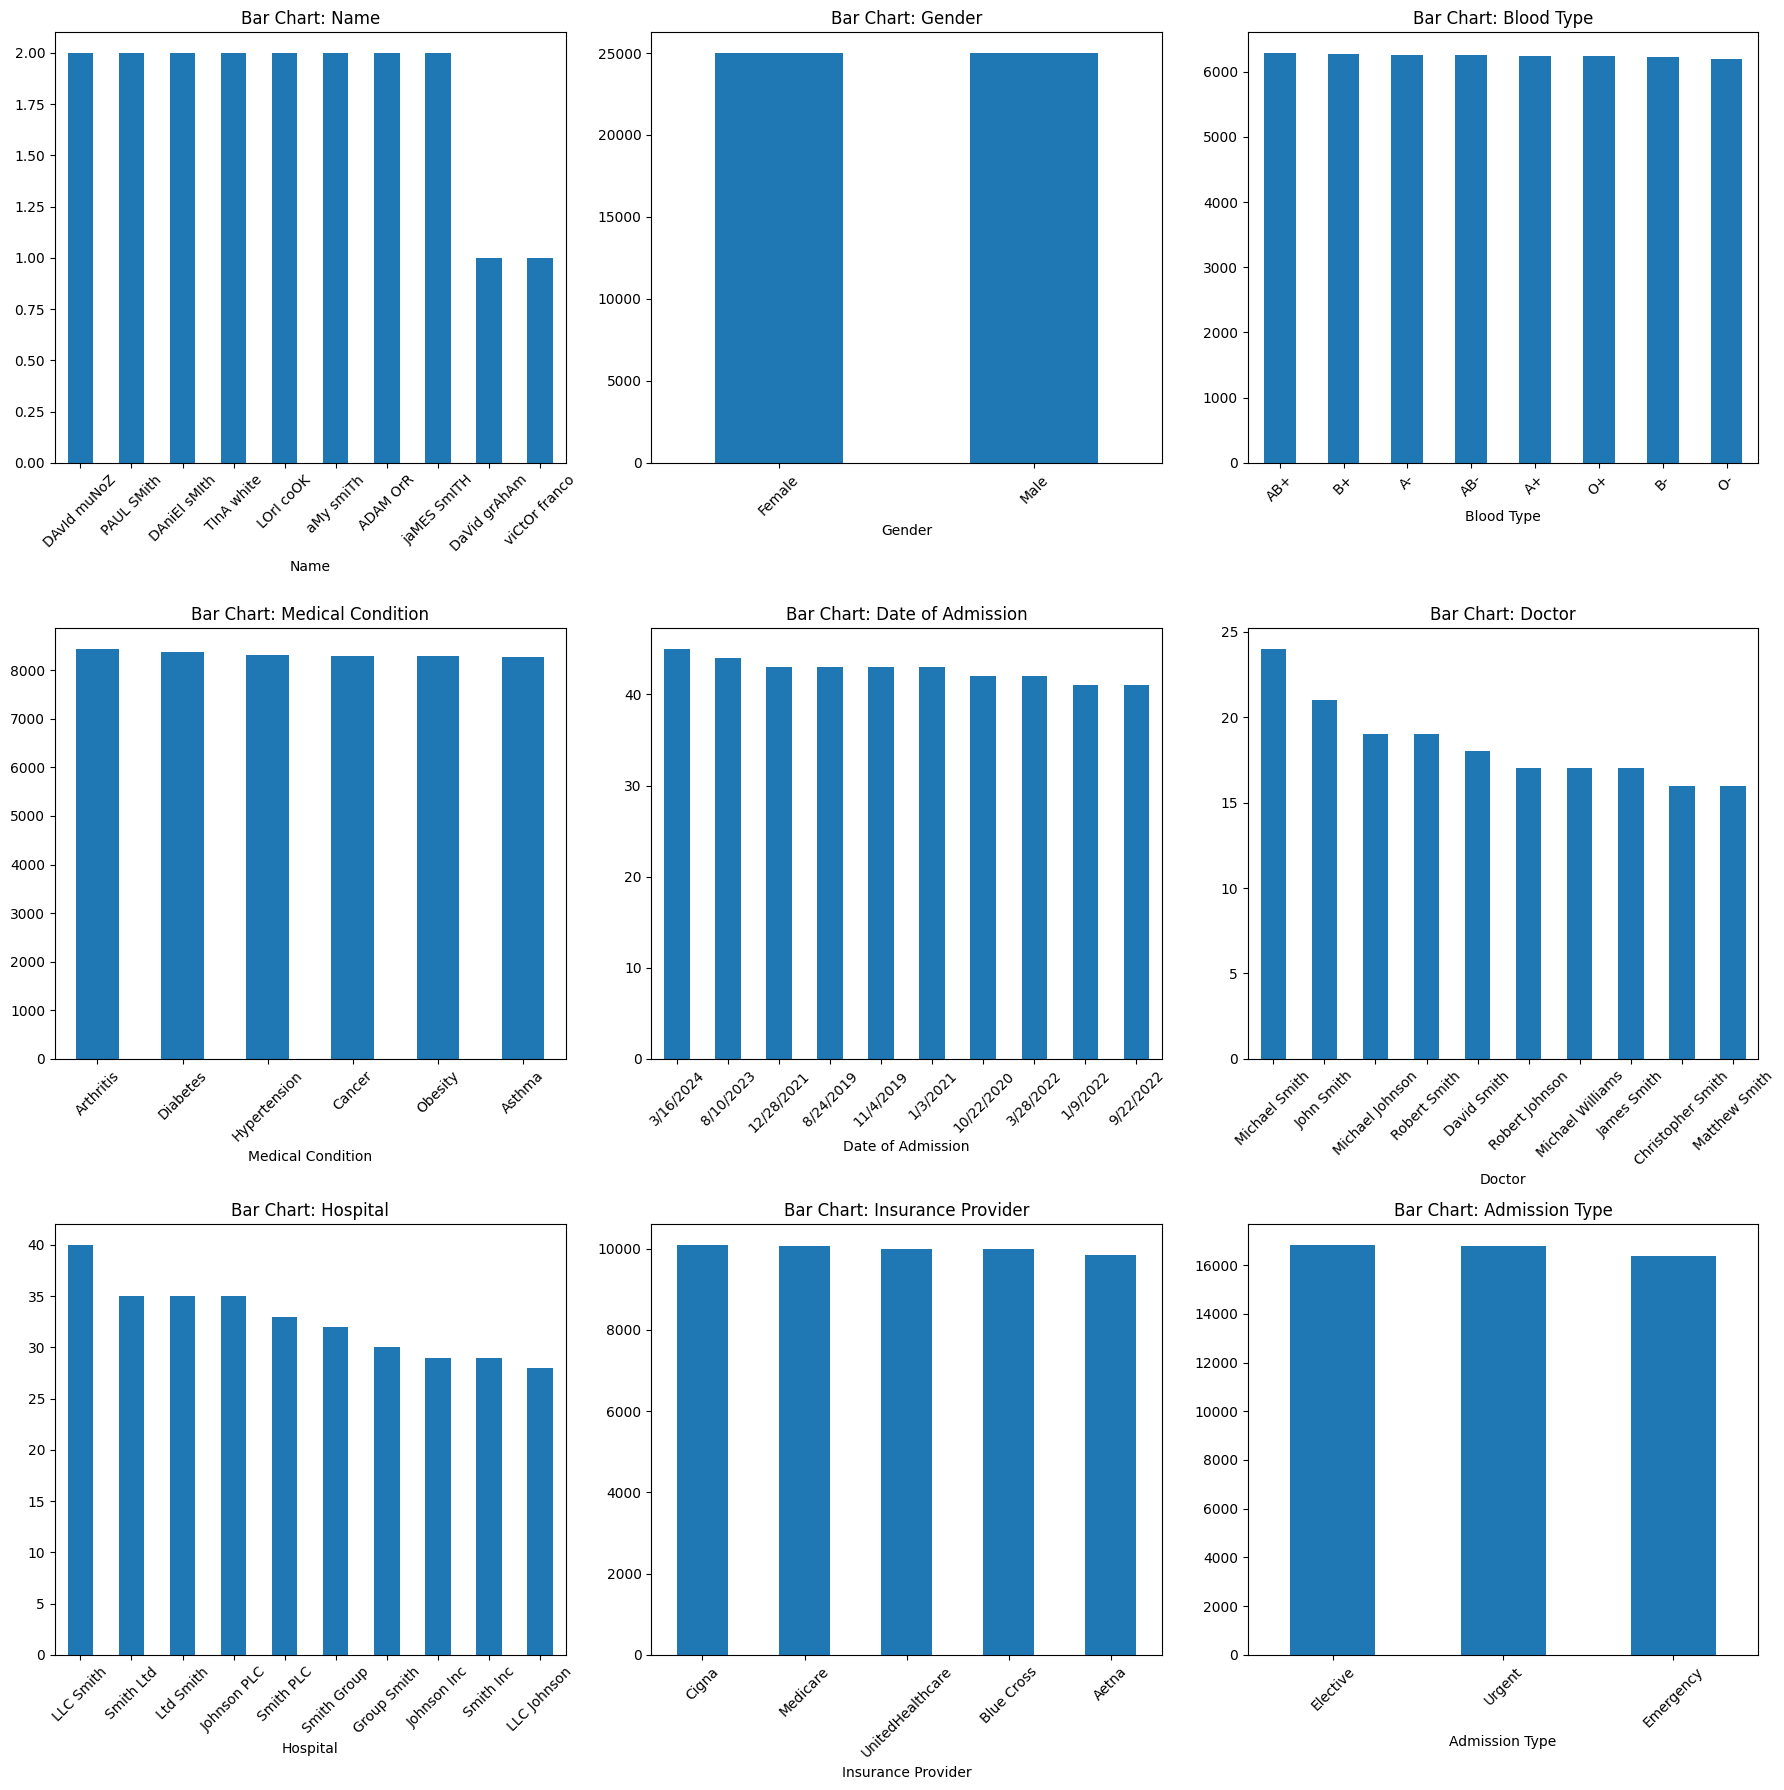

In [260]:
# 6. Bar charts for top categories
plt.figure(figsize=(18, 18))
for i, col in enumerate(categorical_cols[:9], 1):  # Limit to 9 for layout
    plt.subplot(3, 3, i)
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Bar Chart: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Preprocessing

In [261]:
# Step 1: Drop rows with any missing values
df_cleaned = df.dropna()

In [262]:
df_cleaned.isnull().sum()

,0
ID,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0


In [263]:
df_cleaned.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,1.0,Bobby JacksOn,30.0,Male,B-,Cancer,1/31/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328.0,Urgent,2/2/2024,Paracetamol,Normal
1,2.0,LesLie TErRy,62.0,Male,A+,Obesity,8/20/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,8/26/2019,Ibuprofen,Inconclusive
2,3.0,DaNnY sMitH,76.0,Female,A-,Obesity,9/22/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205.0,Emergency,10/7/2022,Aspirin,Normal
3,4.0,andrEw waTtS,28.0,Female,O+,Diabetes,11/18/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450.0,Elective,12/18/2020,Ibuprofen,Abnormal
4,5.0,adrIENNE bEll,43.0,Female,AB+,Cancer,9/19/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,10/9/2022,Penicillin,Abnormal


In [264]:
# Step 2: Standardize text-based categorical fields
df_cleaned['Name'] = df_cleaned['Name'].str.title()
df_cleaned['Gender'] = df_cleaned['Gender'].str.capitalize()
df_cleaned['Medical Condition'] = df_cleaned['Medical Condition'].str.capitalize()
df_cleaned['Doctor'] = df_cleaned['Doctor'].str.title()
df_cleaned['Hospital'] = df_cleaned['Hospital'].str.title()
df_cleaned['Insurance Provider'] = df_cleaned['Insurance Provider'].str.title()
df_cleaned['Medication'] = df_cleaned['Medication'].str.capitalize()
df_cleaned['Test Results'] = df_cleaned['Test Results'].str.capitalize()
df_cleaned['Admission Type'] = df_cleaned['Admission Type'].str.capitalize()


<ipython-input-264-07a19de2a0d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Name'] = df_cleaned['Name'].str.title()
<ipython-input-264-07a19de2a0d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender'] = df_cleaned['Gender'].str.capitalize()
<ipython-input-264-07a19de2a0d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [265]:
# Step 3: Convert date columns to datetime
df_cleaned['Date of Admission'] = pd.to_datetime(df_cleaned['Date of Admission'], errors='coerce')
df_cleaned['Discharge Date'] = pd.to_datetime(df_cleaned['Discharge Date'], errors='coerce')

<ipython-input-265-c458fab52b4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date of Admission'] = pd.to_datetime(df_cleaned['Date of Admission'], errors='coerce')
<ipython-input-265-c458fab52b4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Discharge Date'] = pd.to_datetime(df_cleaned['Discharge Date'], errors='coerce')


In [266]:
# Step 4: Calculate Length of Stay de new feauture
df_cleaned['Length of Stay'] = (df_cleaned['Discharge Date'] - df_cleaned['Date of Admission']).dt.days

<ipython-input-266-34755e4dc789>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Length of Stay'] = (df_cleaned['Discharge Date'] - df_cleaned['Date of Admission']).dt.days


In [267]:
df_cleaned.head()

,ID,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay
0,1.0,Bobby Jackson,30.0,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons And Miller,Blue Cross,18856.28131,328.0,Urgent,2024-02-02,Paracetamol,Normal,2
1,2.0,Leslie Terry,62.0,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.32729,265.0,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,3.0,Danny Smith,76.0,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook Plc,Aetna,27955.09608,205.0,Emergency,2022-10-07,Aspirin,Normal,15
3,4.0,Andrew Watts,28.0,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers And Vang,",Medicare,37909.78241,450.0,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,5.0,Adrienne Bell,43.0,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.31781,458.0,Urgent,2022-10-09,Penicillin,Abnormal,20
